# Finite Differenzen zur Lösung partieller Differentialgleichungen 

In [1]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

---

## Aufgabe 5.1

Betrachten Sie einen Eisenstab der Länge $L=1$m und Temperaturleitfähigkeit $k = \frac{\lambda}{\rho c_p} = 22,8\cdot 10^{-6}\mathrm{m^2/s}$, wessen Ende ($x=0$) befestigt ist und bei konstanter Temperatur $T_L = 373$K gehalten wird. Das freie Ende ($x=L$) gibt der Umgebung einen Wärmestrom $q_R = - \lambda \frac{\mathrm{d} T}{\mathrm{d} x} = 100 \mathrm{W/m^2}$ ab, wobei $\lambda = 81 \mathrm{\frac{W}{m\,K}}$ die Wärmeleitfähigkeit und $c_p = 0,425 \mathrm{\frac{kJ}{kg\,K}}$ die spezifische massenbezogene Wärmekapazität vom Eisen sind. Die Temperaturverteilung $T(x)$ im Stab wird von der folgenden eindimensionalen stationären Wärmeleitungsgleichung bestimmt:

\begin{equation}
    k T_{/xx} + s(x) = 0 \, .                        \qquad\qquad\qquad\text{(1)}
    \label{eq:diff}
\end{equation}

Grundgleichung (1) ist eine lineare Diffusionsgleichung elliptisches Charakters. Eine Heizquelle $s(x) = 10^{-3} \sin(x \pi/L )\, K/s$ befindet sich in der Mitte des Stabs und heizt diesen zusätzlich. Diskretisieren Sie die Gleichung (1) mit finiten Differenzen zweiter Ordnung auf einem äquidistanten Gitter mit $n=50$ Punkten und lösen Sie diese mit den gegebenen Randbedingungen.

In [2]:
##########
# INPUTS #
##########

N =             # [-] Anzahl von Knoten
L =             # [m] Länge des Gebiets

kappa =         # [m^2/s] Temperaturleitfähigkeit
lam =           # [W/mK] Wärmeleitfähigkeit
qR =            # [W/m^2] Wärmestrom am linken Rand
TL =            # [K] Temperatur am rechten Rand

Zuerst können wir das Lösungsgebiet diskretisieren und den diskreten Quellterm berechnen

In [26]:
       # [m] Auflösung
       # Gitter (Vektor der Koordinaten)
       # Amplitude der Quelle
       # Quellterm (Vektor des lokalen Quellterms)

Die diskretisierte Gleichnug (1) kann in Matrix/Vektor Form wie folgt umgeschrieben werden:

\begin{equation}
   \mathsf{D_2} \mathbf{T} = - \mathbf{s}/k  \, ,                        \qquad\qquad\qquad\text{(2)}
\end{equation}

wobei $\mathsf{D_2}$ die Matrix der zweiten Ableitung dastellt, während $\mathbf{T}$ der Vektoren der unbekannten Temperaturwerte und $\mathbf{s}$  der Vektor des bekannten Quellterms ist. Die entsprechende Zeilen des Gleichungssystems (2) sollen durch die diskrete Form der Randbedingungen an den Rändern ersetzt werden. Das so modifizierte Gleichungssystem, welches auch die Randbedingungen beinhaltet kann wie folgt geschrieben werden:

\begin{equation}
   \mathsf{A} \mathbf{T} = \mathbf{b}  \, ,                        \qquad\qquad\qquad\text{(3)}
\end{equation}

wobei $\mathsf{A}$ die Systemmatrix ist und $\mathbf{b}$ der Vekrot der bekannten rechten Seite. Im Folgenden berechnen wir $\mathsf{A}$ und  $\mathbf{b}$ für das gegebene Problem.

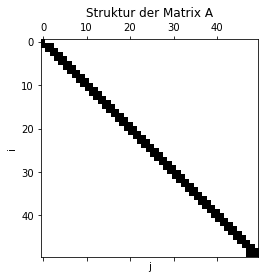

In [27]:
# Wir definieren zuerst die Matrix A als Matrix D2
# und den Vektor b als -s/k. Wir setzten die Randbedingungen 
# in einem zweiten Moment. 


# Dirichlet Randbedingung links (erste Zeile des Gleichgunssystems)


# Neumann Randbedingung am rechten Rand (letzte Zeile des Gleichungssystems)
# vorgegebener Wärmestrom qR = - lambda*dT/dx, also
# dT/dx = -qR / lambda


# Wir können die Struktur der Matrix A darstellen


Wir können jetzt das Gleichungssystem mit np.linalg.solve lösen.

Stellen sie das Ergebnis in einem Diagramm dar. 

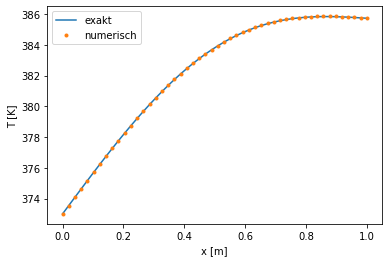

In [29]:
# Darstellung der Lösung


Berechnen Sie die analytische Lösung von Gleichung (1)...

...  und vergleichen Sie diese mit Ihrem numerischem Ergebnis. 

---

## Aufgabe 5.1

Ändern wir nun das betrachtete Randwertproblem. Der Stab wird durch ein mit Fluid gefülltem Rohr der Länge $L$ ersetzt. Das Fluid im Rohr, im Gegensatz zu einem Festkörper, kann strömen, so dass der Wärmetransport im Rohr sowohl durch die Temperaturleitfähigkeit $k$ (Diffusion von Wärme) als auch durch die Bewegung vom Fluid selbst (Konvektion) erfolgen kann. Für den Einlass und Auslass des Rohres werden der Einfachheit halber Dirichlet-Randbedingungen verwendet. Keine Wärmequelle ist vorhanden. Das vollständige Problem lautet wie folgt:  

\begin{equation}
    U T_{/x} - k T_{/xx} = 0 \, ,                      \qquad\qquad\qquad\text{(3)}
    \label{eq:advdiff}
\end{equation}

wobei $U$ eine Konvektionsgeschwindigkeit ist. Die Gleichung (3) kann wie folgt auch in dimensionsloser Form umgeschrieben werden, in dem Sie diese Mal den Faktor $L^2/(k \overline{T})$ multiplizieren, wobei $\overline{T}$ eine charakteristische Temperatur ist: 

\begin{equation}
    Pe T^\ast_{/x^\ast} - T^\ast_{/x^\ast x^\ast} = 0 \, .                      \qquad\qquad\qquad\text{(4)}
    \label{eq:advdiffnondim}
\end{equation}

In Gleichung (4) ist $Pe = U L / \kappa$ die Peclet-Zahl, welche das Verhältnis des konvektiven und diffusiven Transports darstellt, während $T^\ast$ und $x^\ast$ die dimensionslose Temperatur und Koordinate sind. 


Diskretisieren Sie die Gleichung (4) mit zentralen finiten Differenzen zweiter Ordnung. Die dimensionslose Temperatur am linken und rechten Rand ist $T^\ast_L=0$ und $T^\ast_L=10$. Setzten Sie eine Peclet-Zahl von $Pe=50$. Diskretisieren Sie das Lösungsgebiet der dimensionslose Länge $L^\ast=1$ in $N=10,25,30,50$ Punkten. Lösen Sie die diskrete partielle Differentialgleichung und vergleichen Sie das Ergebnis mit der analytischen Lösung

\begin{equation}
        T^\ast(x^\ast) = T^\ast_L + \frac{\exp(Pe\, x^\ast)-1}{\exp(Pe) - 1}(T^\ast_R - T^\ast_L) \, . \qquad\qquad\qquad\text{(5)}
\end{equation}
    
Erhalten Sie immer ein sinnvolles Ergebnis? 

In [ ]:
#################
# USER SETTINGS #
#################

# [-] number of nodes

# [-] Peclet number
# [K] temperature at the end of the beam
# [K] temperature at the root of the beam

In [ ]:
 # [m] grid resolution


Die diskretisierte Gleichnug (4) kann in Matrix/Vektor Form wie folgt umgeschrieben werden:

\begin{equation}
   Pe\mathsf{D_1} \mathbf{T} - \mathsf{D_2} \mathbf{T} =  \mathbf{0}  \, ,                        \qquad\qquad\qquad\text{(6)}
\end{equation}

also auch 

\begin{equation}
   (Pe\mathsf{D_1} - \mathsf{D_2}) \mathbf{T} =  \mathbf{0}  \, ,                        \qquad\qquad\qquad\text{(6)}
\end{equation}

Die entsprechende Zeilen des Gleichungssystems (6) sollen durch die diskrete Form der Randbedingungen an den Rändern ersetzt werden. Das so modifizierte Gleichungssystem, welches auch die Randbedingungen beinhaltet kann wie folgt geschrieben werden:

\begin{equation}
   \mathsf{A} \mathbf{T} = \mathbf{b}  \, ,                        \qquad\qquad\qquad\text{(3)}
\end{equation}

wobei $\mathsf{A}$ die Systemmatrix ist und $\mathbf{b}$ der Vekrot der bekannten rechten Seite. Im Folgenden berechnen wir $\mathsf{A}$ und  $\mathbf{b}$ für das gegebene Problem.

In [ ]:
# Wir definieren A
# zuerst mit dem konvektiven Term 

# und dann mit dem diffusivem


# Wir deklarieren b


# Randbedingungen


# Wir können die Struktur der Matrix A darstellen


Endlich können wir das Gleichungssystem lösen, die analytische Lösung berechnen....

...und das Ergebnis darstellen

In der Definition der P\'eclet-Zahl kann auch die Giterweite $\Delta x$ als bezugslänge verwendet werden. In diesem Fall handelt es sich um die numerische P\'eclet Zahl $Pe_\Delta = U \delta x / k$. Diese Zahl ist ausschlaggebend für die Stabilität des numerischen Verfahrens. Überprüfen Sie, dass ein sinnvolles Ergebnis mit dem aktuellen numerischen Verfahren nur für $Pe_\Delta<2$ erreicht wird. 

Ersetzten Sie in der Diskretisierung des Konvektionsterms die zentrale Differenz zweiter Ordnung mit einer asymmetrischen Differenz erster Ordnung, welche die Richtung der Konvektion berücksichtigt. So werden beispielsweise Rückwärtsdifferenzen verwenden, wenn die Konvektionsgeschwindigkeit $U$ positiv ist. Ein solches Verfahren ist Aufwind (engl. Upwind) benannt. Lösen Sie die Differentialgleichung mit dem neuen Verfahren für die Parameters des Aufgabenteils a). Erhalten Sie immer ein sinnvolles Ergebnis?

In [ ]:
# Wir definieren A
# zuerst mit dem konvektiven Term 

# und dann mit dem diffusivem


# Wir deklarieren b


# Randbedingungen


# Wir können die Struktur der Matrix A darstellen



Wir könne jetzt das Gleichungssystem lösen

und das Ergebnis plotten